In [1]:
# === Imports and dataset loading ===

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

# Ensure plots show properly
plt.style.use("default")
sns.set_theme()

# Load engineered dataset
df = pd.read_csv("data/features/ames_features.csv")

print("Dataset loaded.")
print("Shape:", df.shape)
df.head()

Dataset loaded.
Shape: (2930, 107)


,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Rooms_x_Bathrooms,Bedrooms_x_Bathrooms,Bsmt_Quality_x_FinishedSF,log_Lot_Area,log_Gr_Liv_Area,log_Total_House_SF,log_Total_Bsmt_Finished_SF,log_Total_Porch_SF,log_Outdoor_SF,log_SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,14.0,6.0,1917.0,10.366309,7.412764,7.738924,6.461468,4.143135,5.609472,12.278398
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,5.0,2.0,1836.0,9.360741,6.799056,7.319202,6.418365,4.795791,4.948760,11.561725
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,9.0,4.5,2769.0,9.565775,7.192934,7.720018,6.828712,3.610918,6.063785,12.055256
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,28.0,10.5,3195.0,9.320181,7.654917,8.063378,6.971669,0.000000,0.000000,12.404928
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,15.0,7.5,3164.0,9.534668,7.396335,7.791936,6.674561,3.555348,5.509388,12.154258


In [2]:
# === High-level descriptive statistics ===

print("=== Dataset Overview ===\n")

# Count feature types
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object", "string"]).columns

print(f"Number of numeric features: {len(num_cols)}")
print(f"Number of categorical features: {len(cat_cols)}")
print(f"Total features: {df.shape[1]}\n")

print("=== Numeric summary (first 10 columns) ===")
display(df[num_cols].describe().T.head(10))

print("\n=== Categorical summary (first 10 columns) ===")
display(df[cat_cols].describe().T.head(10))

=== Dataset Overview ===

Number of numeric features: 75
Number of categorical features: 32
Total features: 107

=== Numeric summary (first 10 columns) ===


,count,mean,std,min,25%,50%,75%,max
PID,2930.0,7.144645e+08,1.887308e+08,526301100.0,5.284770e+08,535453620.0,9.071811e+08,1.007100e+09
MS SubClass,2930.0,5.738737e+01,4.263802e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2930.0,6.946314e+01,2.171845e+01,21.0,6.000000e+01,70.0,8.000000e+01,3.130000e+02
Lot Area,2930.0,1.014792e+04,7.880018e+03,1300.0,7.440250e+03,9436.5,1.155525e+04,2.152450e+05
Overall Qual,2930.0,6.094881e+00,1.411026e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2930.0,5.563140e+00,1.111537e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Mas Vnr Area,2930.0,1.010969e+02,1.786345e+02,0.0,0.000000e+00,0.0,1.627500e+02,1.600000e+03
Exter Qual,2930.0,3.398635e+00,5.803175e-01,2.0,3.000000e+00,3.0,4.000000e+00,5.000000e+00
Exter Cond,2930.0,3.085324e+00,3.716980e-01,1.0,3.000000e+00,3.0,3.000000e+00,5.000000e+00
Bsmt Qual,2930.0,3.478840e+00,9.042950e-01,0.0,3.000000e+00,4.0,4.000000e+00,5.000000e+00



=== Categorical summary (first 10 columns) ===


,count,unique,top,freq
MS Zoning,2930,7,RL,2273
Street,2930,2,Pave,2918
Alley,198,2,Grvl,120
Lot Shape,2930,4,Reg,1859
Land Contour,2930,4,Lvl,2633
Utilities,2930,3,AllPub,2927
Lot Config,2930,5,Inside,2140
Land Slope,2930,3,Gtl,2789
Neighborhood,2930,28,NAmes,443
Condition 1,2930,9,Norm,2522


=== Inspecting target variable: SalePrice ===


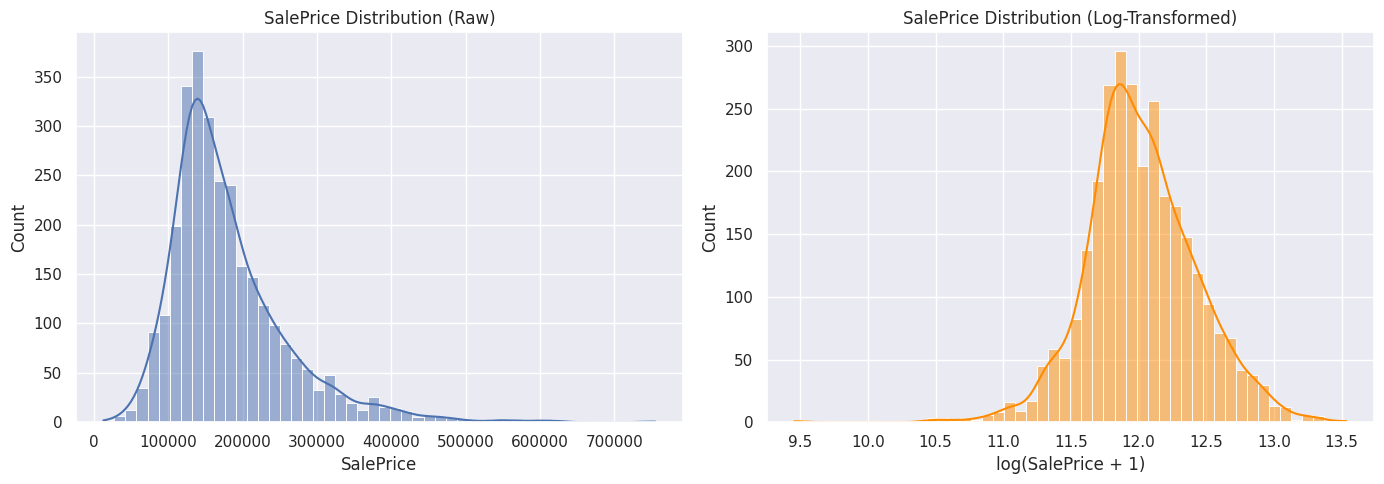


=== Basic Stats ===


count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64


=== Correlation: SalePrice with log(SalePrice) ===
               SalePrice  log_SalePrice
SalePrice       1.000000       0.946304
log_SalePrice   0.946304       1.000000


In [3]:
# === Target Variable Inspection: SalePrice ===

print("=== Inspecting target variable: SalePrice ===")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution of raw SalePrice
sns.histplot(df["SalePrice"], bins=50, kde=True, ax=axes[0])
axes[0].set_title("SalePrice Distribution (Raw)")
axes[0].set_xlabel("SalePrice")
axes[0].set_ylabel("Count")

# Distribution of log SalePrice
sns.histplot(df["log_SalePrice"], bins=50, kde=True, ax=axes[1], color="darkorange")
axes[1].set_title("SalePrice Distribution (Log-Transformed)")
axes[1].set_xlabel("log(SalePrice + 1)")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

print("\n=== Basic Stats ===")
display(df["SalePrice"].describe())

print("\n=== Correlation: SalePrice with log(SalePrice) ===")
print(df[["SalePrice", "log_SalePrice"]].corr())

=== Inspecting target variable: SalePrice ===


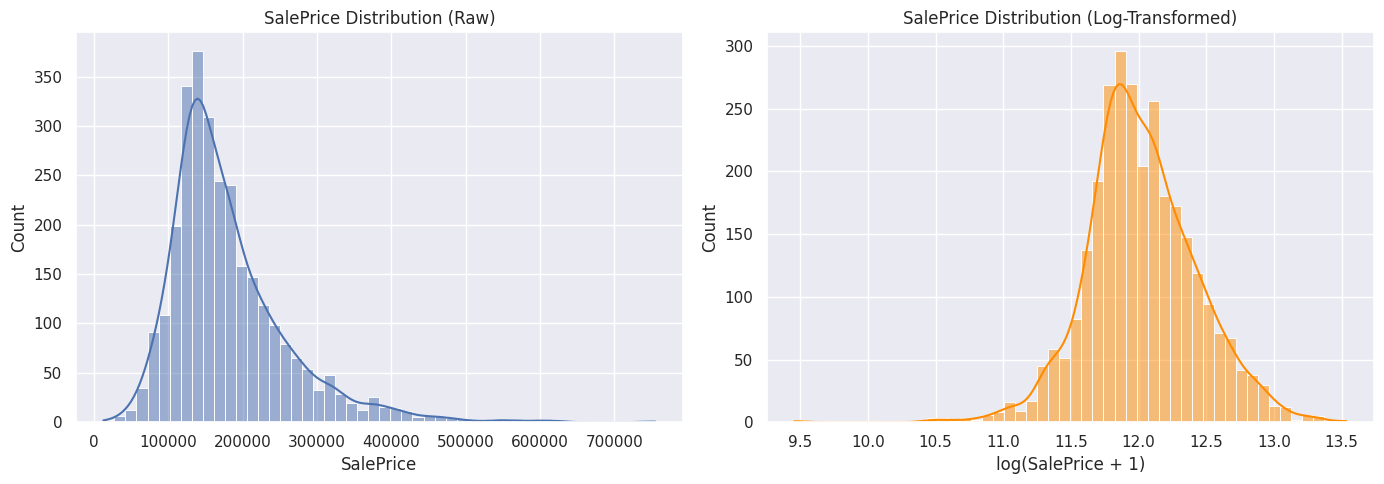


Figure saved at: reports/figures/saleprice_distributions.png

=== Basic Stats ===


count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64


=== Correlation: SalePrice with log(SalePrice) ===
               SalePrice  log_SalePrice
SalePrice       1.000000       0.946304
log_SalePrice   0.946304       1.000000


In [4]:
# === Target Variable Inspection: SalePrice (with image saving) ===

import os

print("=== Inspecting target variable: SalePrice ===")

# Create output folder for figures
os.makedirs("reports/figures", exist_ok=True)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Raw SalePrice distribution
sns.histplot(df["SalePrice"], bins=50, kde=True, ax=axes[0])
axes[0].set_title("SalePrice Distribution (Raw)")
axes[0].set_xlabel("SalePrice")
axes[0].set_ylabel("Count")

# Log-transformed SalePrice
sns.histplot(df["log_SalePrice"], bins=50, kde=True, ax=axes[1], color="darkorange")
axes[1].set_title("SalePrice Distribution (Log-Transformed)")
axes[1].set_xlabel("log(SalePrice + 1)")
axes[1].set_ylabel("Count")

plt.tight_layout()

# Save figure
save_path = "reports/figures/saleprice_distributions.png"
plt.savefig(save_path, dpi=300, bbox_inches="tight")

plt.show()

print(f"\nFigure saved at: {save_path}")

print("\n=== Basic Stats ===")
display(df["SalePrice"].describe())

print("\n=== Correlation: SalePrice with log(SalePrice) ===")
print(df[["SalePrice", "log_SalePrice"]].corr())

=== Plotting distributions of main numeric features ===


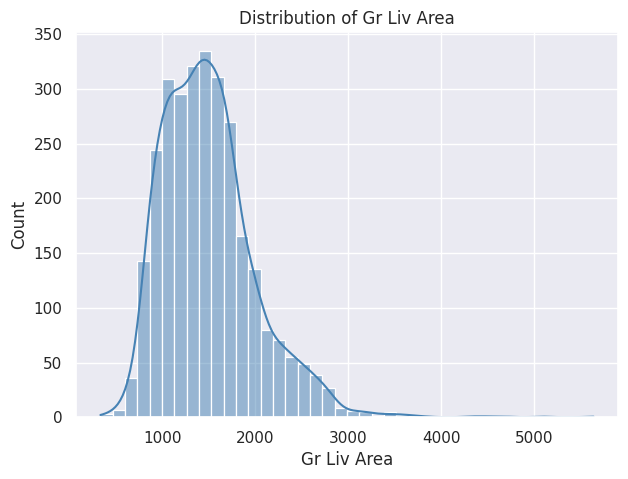

Saved distribution plot for Gr Liv Area: reports/figures/dist_gr_liv_area.png


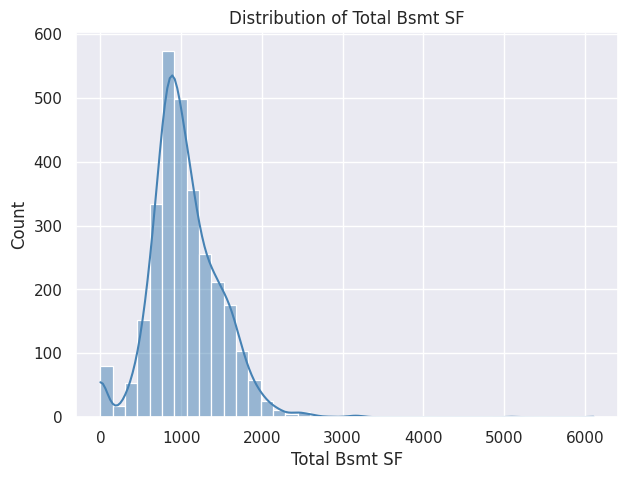

Saved distribution plot for Total Bsmt SF: reports/figures/dist_total_bsmt_sf.png


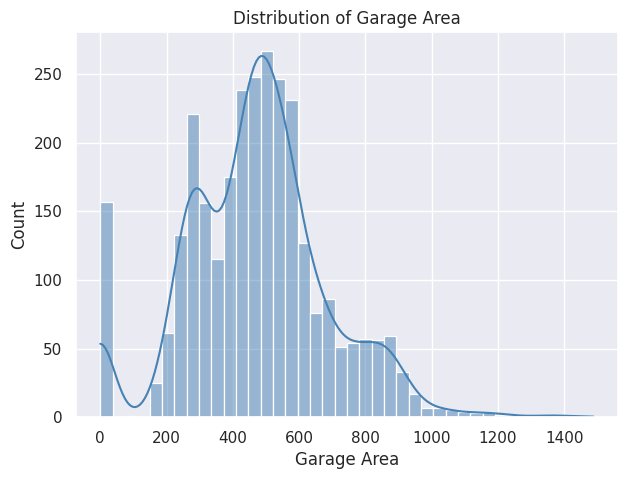

Saved distribution plot for Garage Area: reports/figures/dist_garage_area.png


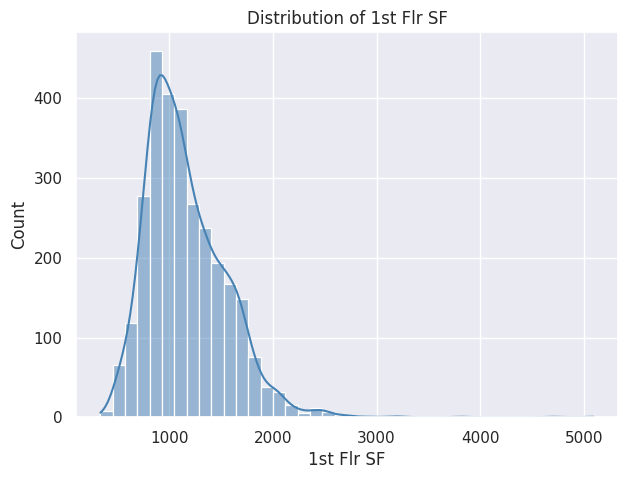

Saved distribution plot for 1st Flr SF: reports/figures/dist_1st_flr_sf.png


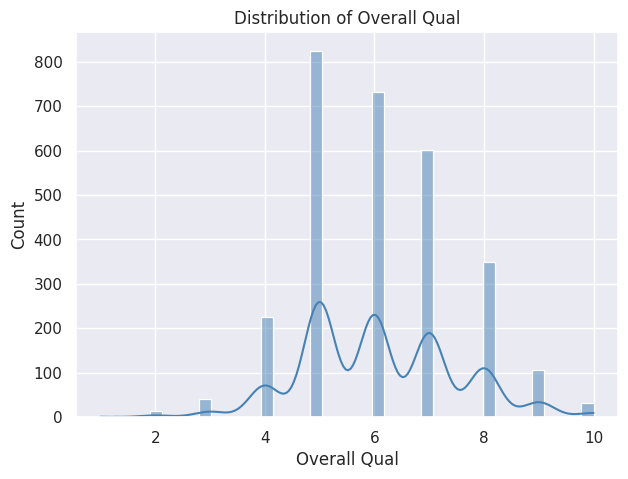

Saved distribution plot for Overall Qual: reports/figures/dist_overall_qual.png


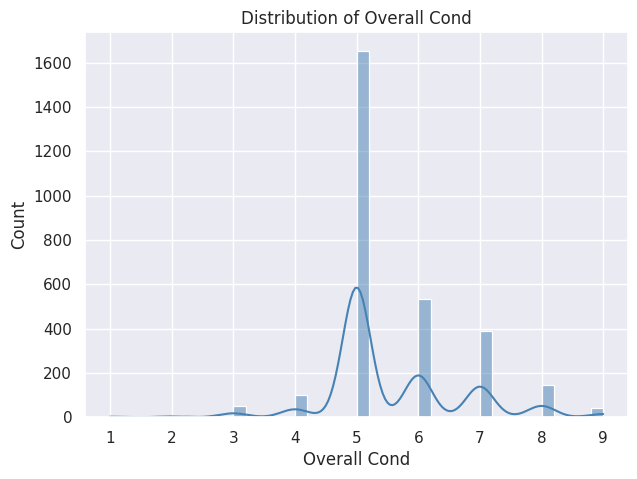

Saved distribution plot for Overall Cond: reports/figures/dist_overall_cond.png


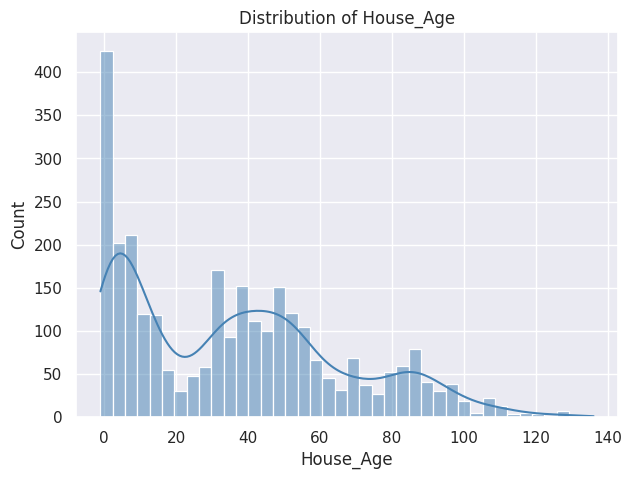

Saved distribution plot for House_Age: reports/figures/dist_house_age.png


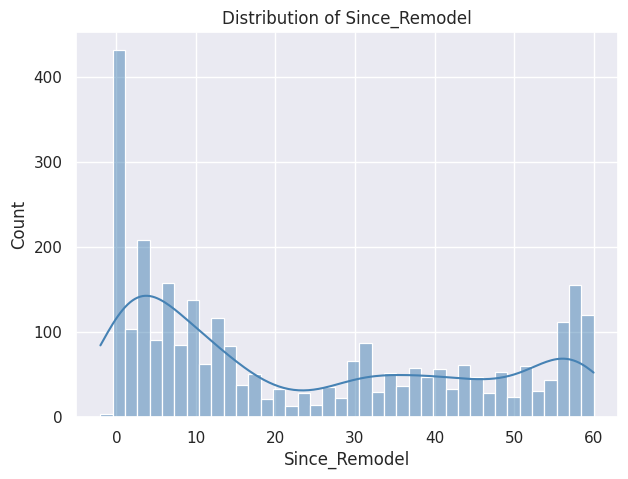

Saved distribution plot for Since_Remodel: reports/figures/dist_since_remodel.png


In [5]:
# === Distribution of Key Numeric Features (saved to reports/figures) ===

import os

print("=== Plotting distributions of main numeric features ===")

os.makedirs("reports/figures", exist_ok=True)

numeric_features = [
    "Gr Liv Area", "Total Bsmt SF", "Garage Area",
    "1st Flr SF", "Overall Qual", "Overall Cond",
    "House_Age", "Since_Remodel"
]

for col in numeric_features:
    if col not in df.columns:
        print(f"Skipping {col} (not found in df)")
        continue
    
    plt.figure(figsize=(7, 5))
    sns.histplot(df[col], kde=True, bins=40, color="steelblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    
    # Save figure
    save_path = f"reports/figures/dist_{col.replace(' ', '_').lower()}.png"
    plt.savefig(save_path, dpi=300, bbox_inches="tight")
    plt.show()
    
    print(f"Saved distribution plot for {col}: {save_path}")

=== Computing correlations with SalePrice ===

=== Top 20 correlations with SalePrice ===


SalePrice             1.000000
log_SalePrice         0.946304
Quality_x_Area        0.845441
Quality_x_TotalSF     0.844528
Overall Qual          0.799262
Total_House_SF        0.731412
log_Total_House_SF    0.711425
Gr Liv Area           0.706780
Exter Qual            0.697970
log_Gr_Liv_Area       0.695075
Rooms_x_Bathrooms     0.679531
Kitchen Qual          0.672914
Garage Cars           0.647812
Garage Area           0.640381
Total_Bathrooms       0.636175
Total Bsmt SF         0.632164
1st Flr SF            0.621676
Bsmt Qual             0.607532
Area_per_Room         0.555629
Full Bath             0.545604
Name: SalePrice, dtype: float64


=== Top 20 correlations with log_SalePrice ===


log_SalePrice         1.000000
SalePrice             0.946304
Overall Qual          0.825645
Quality_x_Area        0.811887
Quality_x_TotalSF     0.798927
log_Total_House_SF    0.746059
log_Gr_Liv_Area       0.723164
Total_House_SF        0.713613
Gr Liv Area           0.695863
Exter Qual            0.684845
Garage Cars           0.675276
Rooms_x_Bathrooms     0.674910
Kitchen Qual          0.666908
Total_Bathrooms       0.666187
Garage Area           0.651123
Bsmt Qual             0.639611
Total Bsmt SF         0.624828
1st Flr SF            0.602629
Full Bath             0.577335
Area_per_Room         0.571830
Name: log_SalePrice, dtype: float64

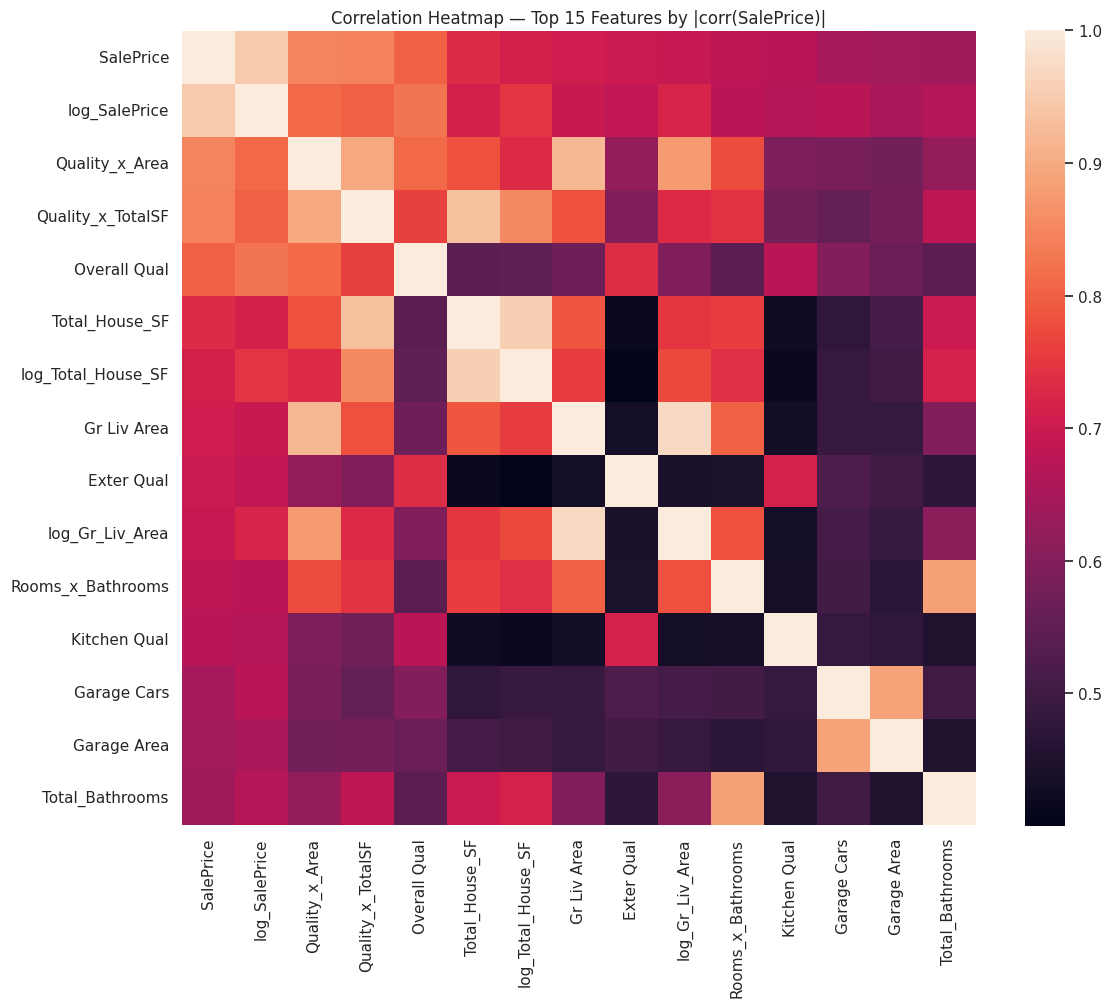


Correlation heatmap saved at: reports/figures/corr_heatmap_top15.png


In [6]:
# === Correlation Analysis & Heatmap ===

import os

print("=== Computing correlations with SalePrice ===")

os.makedirs("reports/figures", exist_ok=True)

# Select numeric columns only
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

corr_matrix = df[num_cols].corr()

# Correlation with raw SalePrice
saleprice_corr = corr_matrix["SalePrice"].sort_values(ascending=False)

print("\n=== Top 20 correlations with SalePrice ===")
display(saleprice_corr.head(20))

# If log_SalePrice exists, show as well
if "log_SalePrice" in df.columns or "log_SalePrice" in num_cols:
    log_corr = corr_matrix["log_SalePrice"].sort_values(ascending=False)
    print("\n=== Top 20 correlations with log_SalePrice ===")
    display(log_corr.head(20))

# Heatmap for top correlated features (excluding SalePrice itself)
top_features = saleprice_corr.head(15).index.tolist()

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix.loc[top_features, top_features],
    annot=False,
    fmt=".2f",
    square=True
)
plt.title("Correlation Heatmap — Top 15 Features by |corr(SalePrice)|")
plt.tight_layout()

heatmap_path = "reports/figures/corr_heatmap_top15.png"
plt.savefig(heatmap_path, dpi=300, bbox_inches="tight")
plt.show()

print(f"\nCorrelation heatmap saved at: {heatmap_path}")

In [7]:
# === Load cleaned dataset ===
import pandas as pd

df_clean = pd.read_csv("data/cleaned/ames_cleaned.csv")

print("Cleaned dataset loaded:")
print(df_clean.shape)
df_clean.head()

Cleaned dataset loaded:
(2930, 82)


,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,log_SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,0,5,2010-01-01,WD,Normal,215000,12.278398
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,0,6,2010-01-01,WD,Normal,105000,11.561725
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,Gar2,12500,6,2010-01-01,WD,Normal,172000,12.055256
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,0,4,2010-01-01,WD,Normal,244000,12.404928
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,0,3,2010-01-01,WD,Normal,189900,12.154258


In [8]:
import numpy as np

# Create log-transformed SalePrice
df_clean["log_SalePrice"] = np.log1p(df_clean["SalePrice"])

print("Added log_SalePrice column.")
df_clean[["SalePrice", "log_SalePrice"]].head()

Added log_SalePrice column.


,SalePrice,log_SalePrice
0,215000,12.278398
1,105000,11.561725
2,172000,12.055256
3,244000,12.404928
4,189900,12.154258


In [9]:
# Save updated cleaned dataset
df_clean.to_csv("data/cleaned/ames_cleaned.csv", index=False)

print("log_SalePrice added and cleaned dataset updated successfully.")

log_SalePrice added and cleaned dataset updated successfully.


=== Pairplot of key variables ===


Saved pairplot to: figures/pairplot_key_predictors.png


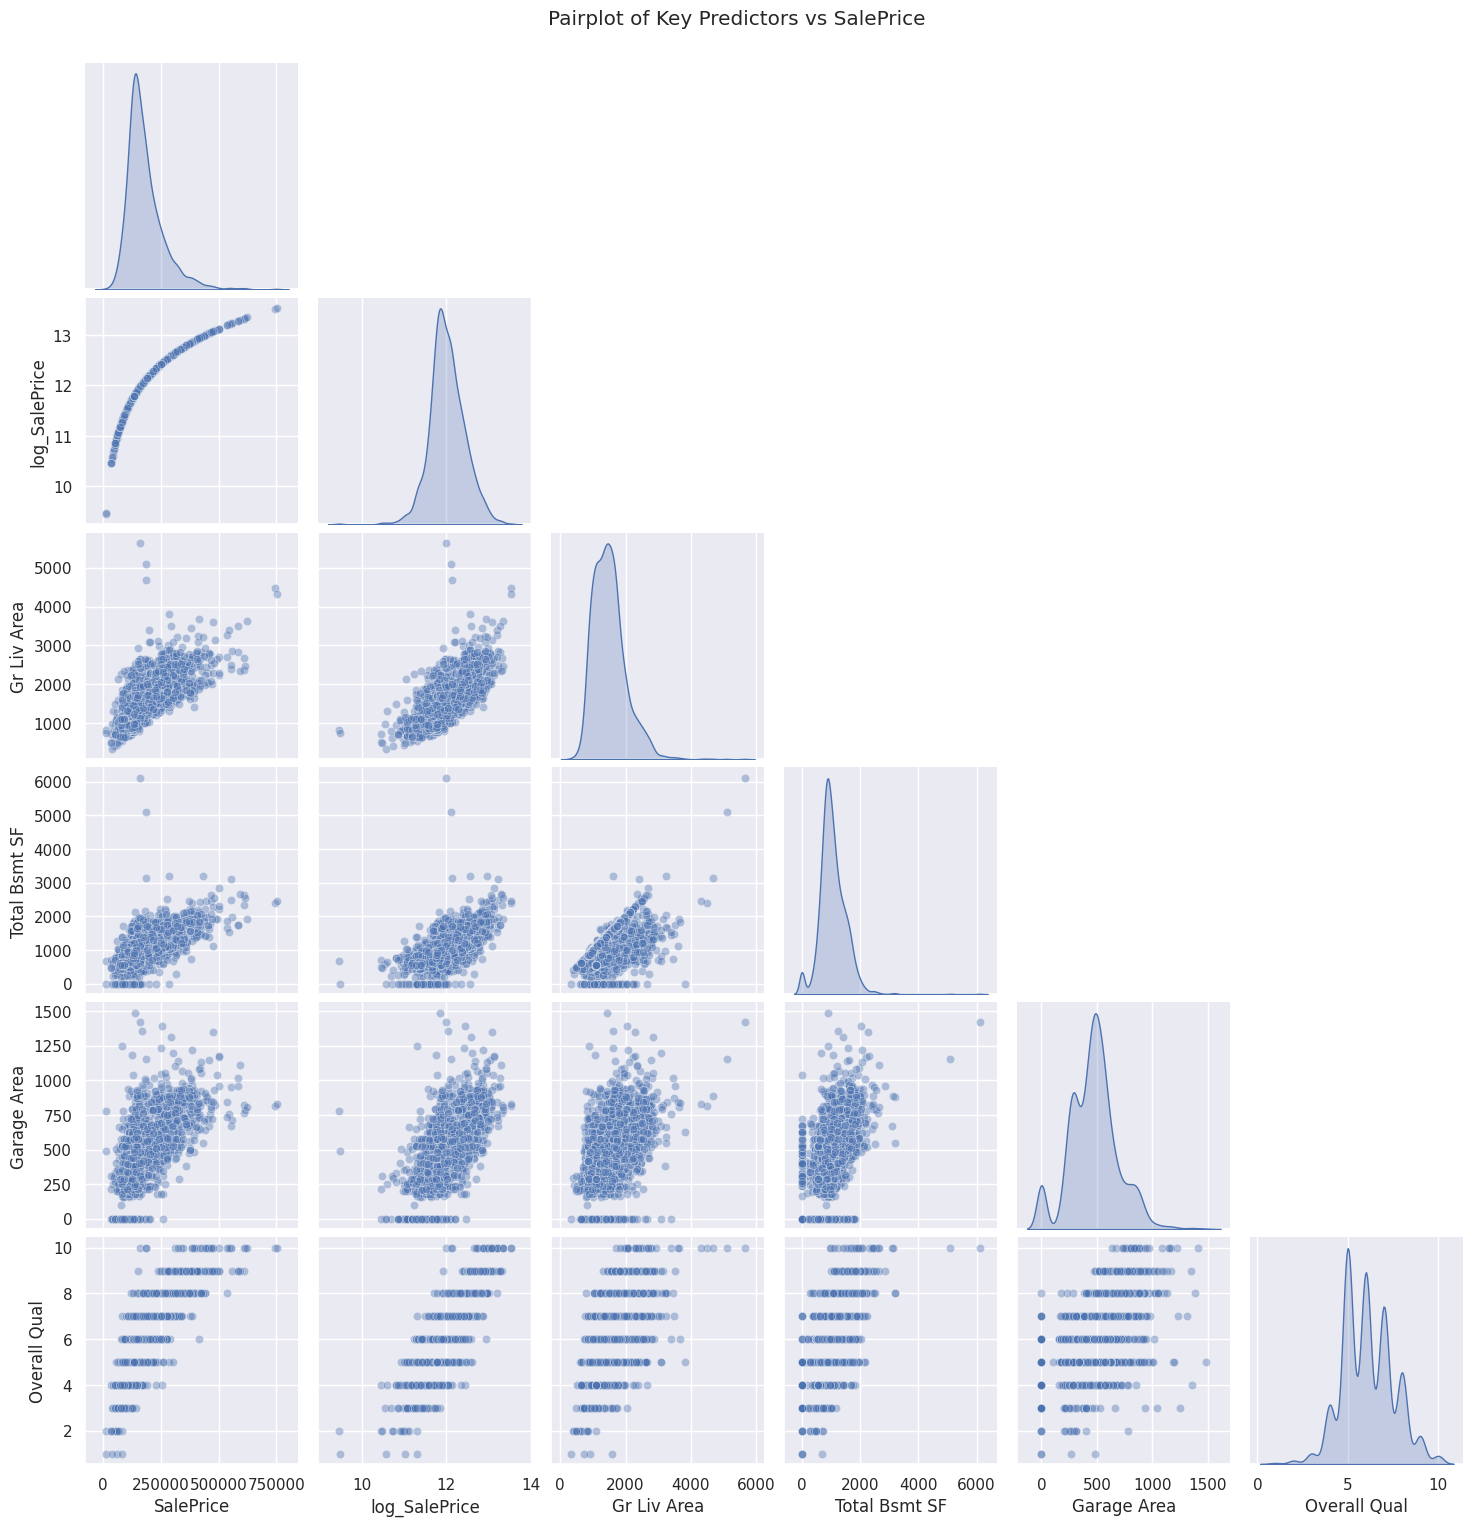

In [10]:
# === Pairplot of Key Predictors ===
import seaborn as sns
import matplotlib.pyplot as plt
import os

print("=== Pairplot of key variables ===")

# Make sure figures folder exists
os.makedirs("figures", exist_ok=True)

key_vars = [
    "SalePrice",
    "log_SalePrice",
    "Gr Liv Area",
    "Total Bsmt SF",
    "Garage Area",
    "Overall Qual",
    "Year Built"
]

pairplot_fig = sns.pairplot(
    df_clean[key_vars],
    diag_kind="kde",
    corner=True,
    plot_kws={'alpha': 0.4}
)

pairplot_fig.fig.suptitle("Pairplot of Key Predictors vs SalePrice", y=1.02)

# Save figure
output_path = "figures/pairplot_key_predictors.png"
pairplot_fig.savefig(output_path, dpi=300)

print(f"Saved pairplot to: {output_path}")

plt.show()

=== Computing correlation matrix ===


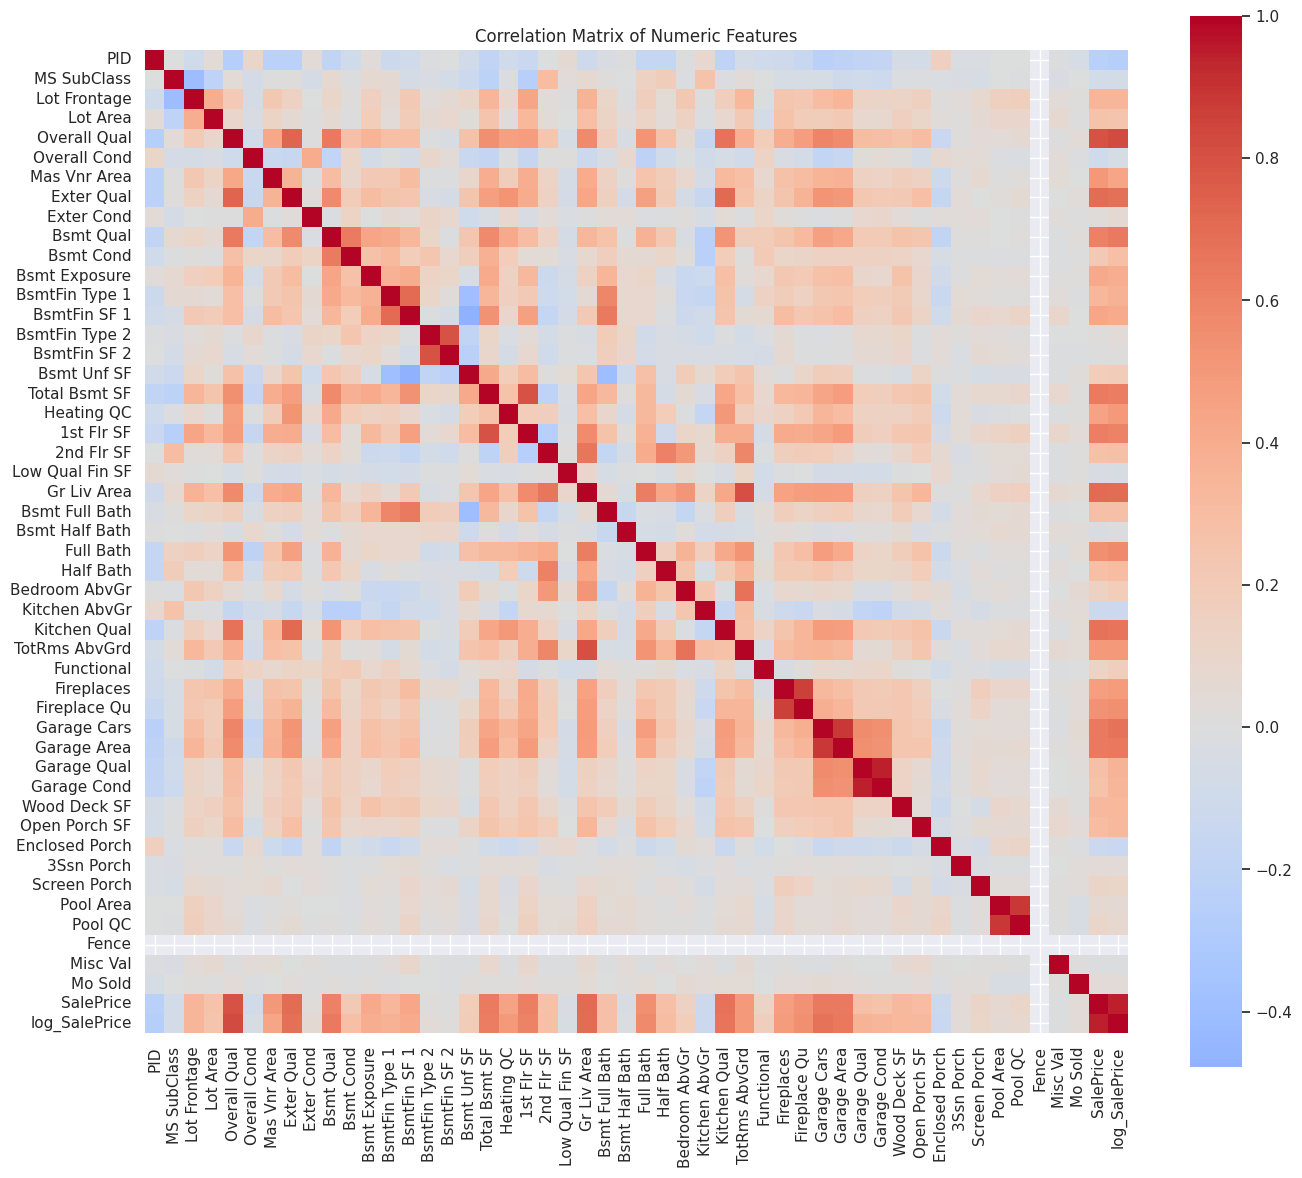

Saved: figures/correlation_matrix_numeric.png


In [11]:
# === Correlation Matrix for Numeric Predictors ===
import seaborn as sns
import matplotlib.pyplot as plt
import os

print("=== Computing correlation matrix ===")

# Select only numeric features (including log_SalePrice)
numeric_cols = df_clean.select_dtypes(include=["int64", "float64"]).columns

corr_matrix = df_clean[numeric_cols].corr()

# Create output directory if needed
os.makedirs("figures", exist_ok=True)

plt.figure(figsize=(14, 12))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    annot=False,
    square=True,
    cbar=True
)
plt.title("Correlation Matrix of Numeric Features")

plt.tight_layout()
plt.savefig("figures/correlation_matrix_numeric.png", dpi=300)
plt.show()

print("Saved: figures/correlation_matrix_numeric.png")

In [12]:
# === Top correlations with SalePrice and log_SalePrice ===

import pandas as pd
import os

print("=== Computing top correlations with SalePrice and log_SalePrice ===")

# Use only numeric columns for correlation
num_cols = df_clean.select_dtypes(include=["int64", "float64"]).columns
corr_matrix = df_clean[num_cols].corr()

# Correlation with raw SalePrice
corr_raw = corr_matrix["SalePrice"].sort_values(ascending=False)

# Correlation with log SalePrice (if present)
if "log_SalePrice" in corr_matrix.columns:
    corr_log = corr_matrix["log_SalePrice"].sort_values(ascending=False)
else:
    corr_log = None

print("\nTop 15 correlations with SalePrice:\n")
print(corr_raw.head(15))

if corr_log is not None:
    print("\nTop 15 correlations with log_SalePrice:\n")
    print(corr_log.head(15))

# Save full ranking to CSV
os.makedirs("reports", exist_ok=True)

corr_df = pd.DataFrame({"corr_with_SalePrice": corr_raw})
if corr_log is not None:
    corr_df["corr_with_log_SalePrice"] = corr_log

corr_df.to_csv("reports/top_correlations.csv")

print("\nSaved correlation ranking to reports/top_correlations.csv")

=== Computing top correlations with SalePrice and log_SalePrice ===

Top 15 correlations with SalePrice:

SalePrice        1.000000
log_SalePrice    0.946304
Overall Qual     0.799262
Gr Liv Area      0.706780
Exter Qual       0.697970
Kitchen Qual     0.672914
Garage Cars      0.647812
Garage Area      0.640381
Total Bsmt SF    0.632164
1st Flr SF       0.621676
Bsmt Qual        0.607532
Full Bath        0.545604
Fireplace Qu     0.533901
Mas Vnr Area     0.502196
TotRms AbvGrd    0.495474
Name: SalePrice, dtype: float64

Top 15 correlations with log_SalePrice:

log_SalePrice    1.000000
SalePrice        0.946304
Overall Qual     0.825645
Gr Liv Area      0.695863
Exter Qual       0.684845
Garage Cars      0.675276
Kitchen Qual     0.666908
Garage Area      0.651123
Bsmt Qual        0.639611
Total Bsmt SF    0.624828
1st Flr SF       0.602629
Full Bath        0.577335
Fireplace Qu     0.545800
Heating QC       0.492916
TotRms AbvGrd    0.492580
Name: log_SalePrice, dtype: float64

Sav

In [13]:
# === Scatterplots with regression for top predictors ===
import seaborn as sns
import matplotlib.pyplot as plt
import os

print("=== Generating scatterplots for top predictors ===")

# Ensure output directory exists
os.makedirs("figures/eda", exist_ok=True)

# Load the correlation ranking (we saved this earlier)
corr_df = pd.read_csv("reports/top_correlations.csv", index_col=0)

# Select the top 10 numeric predictors (excluding target variables)
top_features = (
    corr_df["corr_with_SalePrice"]
    .drop(["SalePrice", "log_SalePrice"], errors="ignore")
    .abs()
    .sort_values(ascending=False)
    .head(10)
    .index
    .tolist()
)

print("Top predictors selected:", top_features)

# Plot for each feature
for feature in top_features:
    plt.figure(figsize=(7, 5))
    
    sns.regplot(
        data=df_clean,
        x=feature,
        y="SalePrice",
        scatter_kws={"alpha": 0.4},
        line_kws={"color": "red"}
    )
    
    plt.title(f"SalePrice vs {feature}")
    plt.tight_layout()
    
    # Save figure
    outfile = f"figures/eda/scatter_SalePrice_{feature}.png"
    plt.savefig(outfile, dpi=300)
    plt.close()
    print(f"Saved: {outfile}")

# Repeat for log-transformed target
for feature in top_features:
    plt.figure(figsize=(7, 5))
    
    sns.regplot(
        data=df_clean,
        x=feature,
        y="log_SalePrice",
        scatter_kws={"alpha": 0.4},
        line_kws={"color": "blue"}
    )
    
    plt.title(f"log_SalePrice vs {feature}")
    plt.tight_layout()
    
    outfile = f"figures/eda/scatter_logSalePrice_{feature}.png"
    plt.savefig(outfile, dpi=300)
    plt.close()
    print(f"Saved: {outfile}")

print("\nAll scatterplots saved successfully.")

=== Generating scatterplots for top predictors ===
Top predictors selected: ['Overall Qual', 'Gr Liv Area', 'Exter Qual', 'Kitchen Qual', 'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Bsmt Qual', 'Full Bath']
Saved: figures/eda/scatter_SalePrice_Overall Qual.png
Saved: figures/eda/scatter_SalePrice_Gr Liv Area.png
Saved: figures/eda/scatter_SalePrice_Exter Qual.png
Saved: figures/eda/scatter_SalePrice_Kitchen Qual.png
Saved: figures/eda/scatter_SalePrice_Garage Cars.png
Saved: figures/eda/scatter_SalePrice_Garage Area.png
Saved: figures/eda/scatter_SalePrice_Total Bsmt SF.png
Saved: figures/eda/scatter_SalePrice_1st Flr SF.png
Saved: figures/eda/scatter_SalePrice_Bsmt Qual.png
Saved: figures/eda/scatter_SalePrice_Full Bath.png
Saved: figures/eda/scatter_logSalePrice_Overall Qual.png
Saved: figures/eda/scatter_logSalePrice_Gr Liv Area.png
Saved: figures/eda/scatter_logSalePrice_Exter Qual.png
Saved: figures/eda/scatter_logSalePrice_Kitchen Qual.png
Saved: figures/eda/sca

In [14]:
import os
import shutil

src = "notebooks/figures"
dst = "reports/figures"

# Ensure destination exists
os.makedirs(dst, exist_ok=True)

# Move all files
if os.path.exists(src):
    for root, dirs, files in os.walk(src):
        for f in files:
            src_path = os.path.join(root, f)
            dst_path = os.path.join(dst, f)
            shutil.move(src_path, dst_path)
            print(f"Moved: {src_path} -> {dst_path}")

    # Remove empty directories
    shutil.rmtree(src)
    print("\nRemoved old directory:", src)
else:
    print("Directory notebooks/figures does not exist — nothing to move.")

Directory notebooks/figures does not exist — nothing to move.
